## Analysis for Cortical Cell Images

A comprehensive workflow for enhancing microscopy images of cortical cells and performing FFT analysis on them.

Developed by: 
Roberto dos Reis, PhD - Northwestern Univeristy/2025 

roberto.reis@northwestern.edu

and

Paloma Lee - Northwestern University/2025

palomalee2025@u.northwestern.edu


This notebook is part of the paper entitled:
(TBD)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from pathlib import Path

import ncempy.io as nio

from sklearn.decomposition import NMF


## Load and Display the Original Image

First, let's load the image and examine it.

In [7]:
# file_path = 'selected_images/2024-07-11_3200_Wool_Devon/Devon_5E w UA -EtOH_20kX_0031.dm4' #linear
file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0032.dm4' #linear
 
# file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0013.dm4' #circular
# file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0021.dm4' #circular
# file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0022.dm4' #circular

# file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0034.dm4' #hex
# file_path = 'selected_images/Devon_5E w UA -EtOH_20kX_0035.dm4' #hex


In [8]:
def load_dm4(file_path):
    dmData = nio.read(file_path)
    return dmData

im_data= load_dm4(file_path)

print(im_data['data'].shape) # the shape of the data
print(im_data['pixelSize']) # print the pixel size

img = im_data['data']
scale = im_data['pixelSize']

(3838, 3710)
[0.18341091, 0.18341091]


In [9]:
# # Replace with the path to your image for a png/tiff image
# image_path = 'images/B_nonmag.png'

# # Load the image
# try:
#     img = load_image(image_path)
#     display_image(img, 'Original Image')
# except FileNotFoundError:
#     print("Please update the image_path variable with the correct path to your image.")
#     # You can also use a sample image for testing
#     # from skimage import data
#     # img = data.camera()
#     # display_image(img, 'Sample Test Image')

## Step 1: Image Pre-processing

Let's apply several pre-processing steps to enhance the image quality before FFT analysis.

Scale value: [0.18341091, 0.18341091]


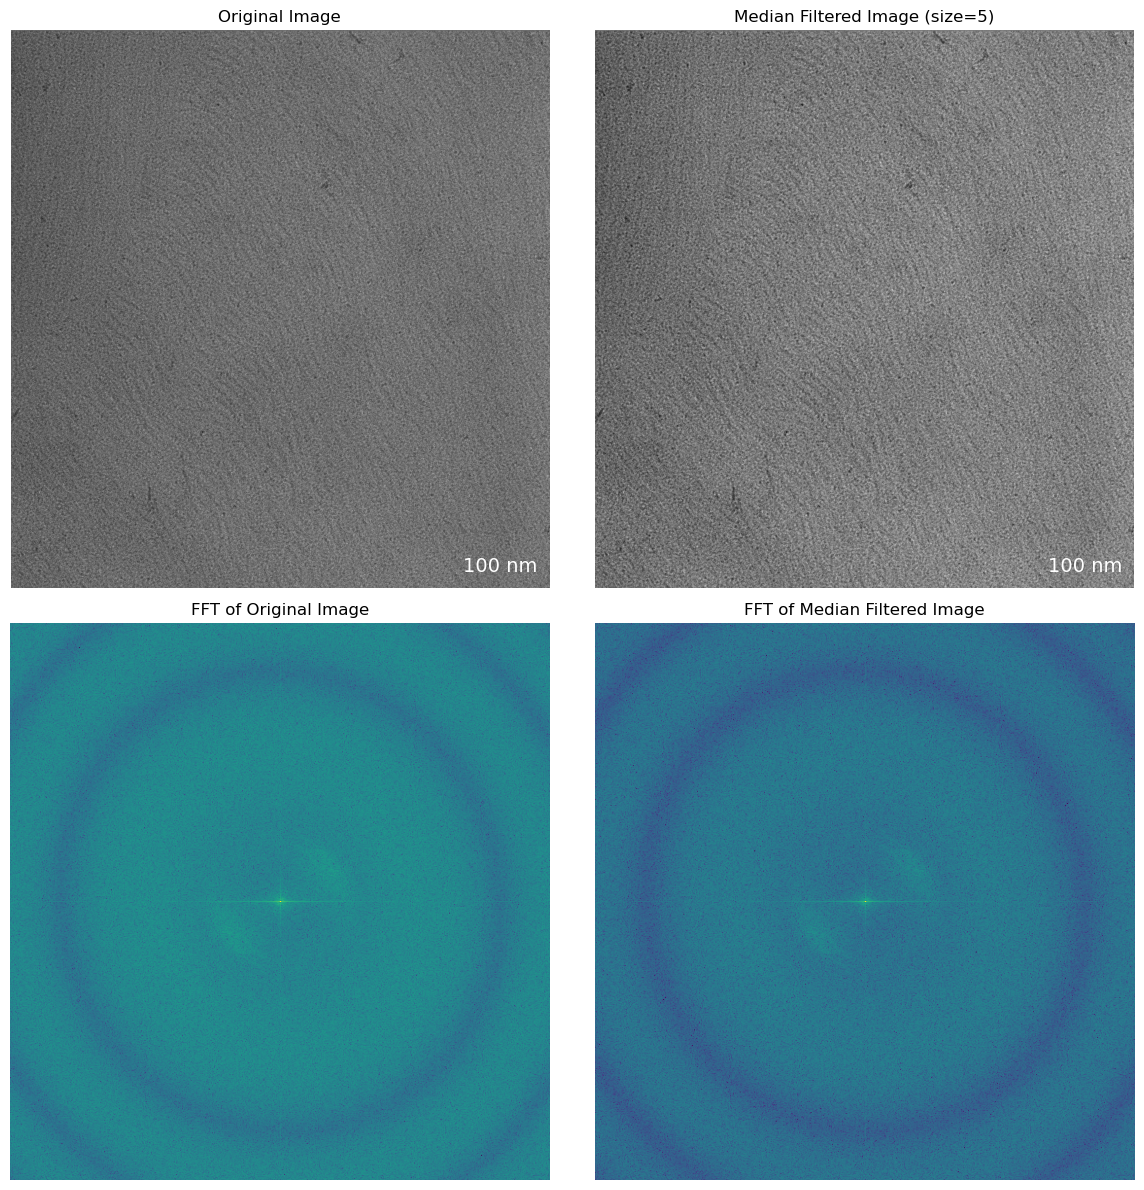

Pixel size: 183410912.75 nm
Scale bar: 100 nm = 0 pixels


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Apply median filter
img_median = median_filter(img, size=5)  # Adjust size parameter as needed

# Calculate FFT
fft_original = np.fft.fftshift(np.fft.fft2(img))
fft_filtered = np.fft.fftshift(np.fft.fft2(img_median))

# Function to crop and display FFT
def plot_fft(fft_img, ax, title, crop_factor=0.3):
    # Log transform for better visualization
    magnitude = np.log1p(np.abs(fft_img))
    
    # Crop to show only low frequencies
    h, w = magnitude.shape
    crop_h, crop_w = int(h * crop_factor), int(w * crop_factor)
    center_h, center_w = h // 2, w // 2
    cropped = magnitude[center_h - crop_h//4:center_h + crop_h//4, 
                        center_w - crop_w//4:center_w + crop_w//4]
    
    im = ax.imshow(cropped, cmap='viridis')
    ax.set_title(title)
    ax.axis('off')
    return im

# Create comparison plot with original, filtered, and FFTs
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Get pixel size in nm - handle the case where scale might be a sequence
# First, print the scale to understand what it contains
print("Scale value:", scale)

# Handle different scale structures
if isinstance(scale, (list, tuple)):
    # If it's a list/tuple, use the first value (x dimension)
    pixel_size_nm = scale[0] * 1e9
else:
    # If it's a single value
    pixel_size_nm = float(scale) * 1e9  # Convert to nm (assuming scale is in meters)

# Calculate scale bar length in pixels based on desired physical length
desired_bar_length_nm = 100  # 100 nm scale bar
scale_bar_length_pixels = int(desired_bar_length_nm / pixel_size_nm)

# Original image with scale bar
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
fontprops = fm.FontProperties(size=14)
scalebar = AnchoredSizeBar(axs[0, 0].transData,
                          scale_bar_length_pixels,  # length in pixels
                          f'{desired_bar_length_nm} nm',  # label
                          'lower right', 
                          pad=0.5,
                          color='white',
                          frameon=False,
                          size_vertical=3,
                          fontproperties=fontprops)
axs[0, 0].add_artist(scalebar)
axs[0, 0].axis('off')

# Median filtered image with scale bar
axs[0, 1].imshow(img_median, cmap='gray')
axs[0, 1].set_title('Median Filtered Image (size=5)')
scalebar = AnchoredSizeBar(axs[0, 1].transData,
                          scale_bar_length_pixels,  # length in pixels
                          f'{desired_bar_length_nm} nm',  # label
                          'lower right', 
                          pad=0.5,
                          color='white',
                          frameon=False,
                          size_vertical=3,
                          fontproperties=fontprops)
axs[0, 1].add_artist(scalebar)
axs[0, 1].axis('off')

# FFT of original image
plot_fft(fft_original, axs[1, 0], 'FFT of Original Image')

# FFT of filtered image
plot_fft(fft_filtered, axs[1, 1], 'FFT of Median Filtered Image')

plt.tight_layout()
plt.show()

# Print the scale information for reference
print(f"Pixel size: {pixel_size_nm:.2f} nm")
print(f"Scale bar: {desired_bar_length_nm} nm = {scale_bar_length_pixels} pixels")